Unit 2 - Lesson 4- Project 2

## DRILL: Prepare the Data

[Download the Excel file here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls) on crime data in New York State in 2013, provided by the FBI: UCR ([Thinkful mirror](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv)).

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

## Import the dataset and clean

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel ('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
df_nypd = df.drop([0,1,2, 3])
df_nypd.columns = df.iloc[3]
df_nypd= df_nypd.reset_index(drop=True)

In [4]:
df_nypd.columns = df_nypd.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(', '').str.replace(')','').str.replace('\n', '_')

In [5]:
df_nypd.loc[df_nypd['murder_and_nonnegligent_manslaughter'].isna(), 'murder_and_nonnegligent_manslaughter'] =0
df_nypd.loc[df_nypd['robbery'].isna(), 'robbery'] =0
df_nypd['population'] = df_nypd.population.fillna(df_nypd.population.mean())

In [6]:
df_nypd

3,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised_definition1,rape_legacy_definition2,robbery,aggravated_assault,property_crime,burglary,larceny-_theft,motor_vehicle_theft,arson3
0,Adams Village,1861.000,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577.000,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846.000,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956.000,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388.000,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089.000,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781.000,3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,118296.000,107,1,NaN,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519.000,9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,18182.000,30,0,NaN,0,12,18,405,99,291,15,0


## Select the features for Modeling

In [9]:
features = pd.DataFrame(df_nypd['population'])

In [11]:
features['population_sqd'] = df_nypd['population'] * df_nypd['population']

In [17]:
features['murder'] = np.where(df_nypd['murder_and_nonnegligent_manslaughter']>0, 1, 0)
features['robbery']= np.where(df_nypd['robbery']>0, 1,0)

In [18]:
features

,population,population_sqd,murder,robbery
0,1861.000,3463321.000,0,0
1,2577.000,6640929.000,0,0
2,2846.000,8099716.000,0,0
3,97956.000,9595377936.000,1,1
4,6388.000,40806544.000,0,1
5,4089.000,16719921.000,0,1
6,1781.000,3171961.000,0,0
7,118296.000,13993943616.000,1,1
8,9519.000,90611361.000,0,1
9,18182.000,330585124.000,0,1


## Visualize the features

                population  population_sqd  murder  robbery
population           1.000           0.998   0.162    0.064
population_sqd       0.998           1.000   0.133    0.044
murder               0.162           0.133   1.000    0.315
robbery              0.064           0.044   0.315    1.000


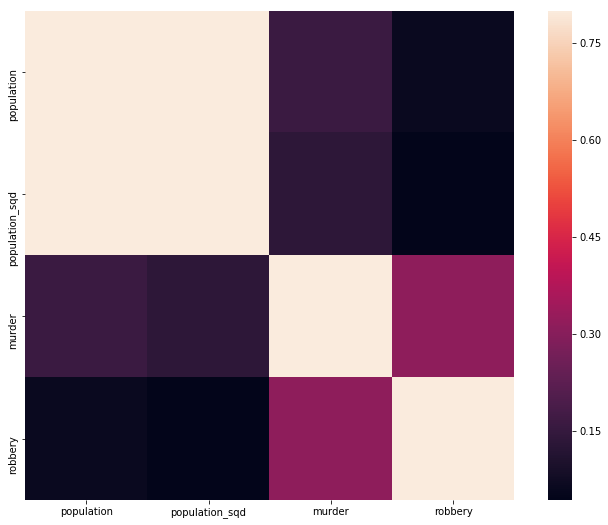

In [23]:
corrmat = features.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

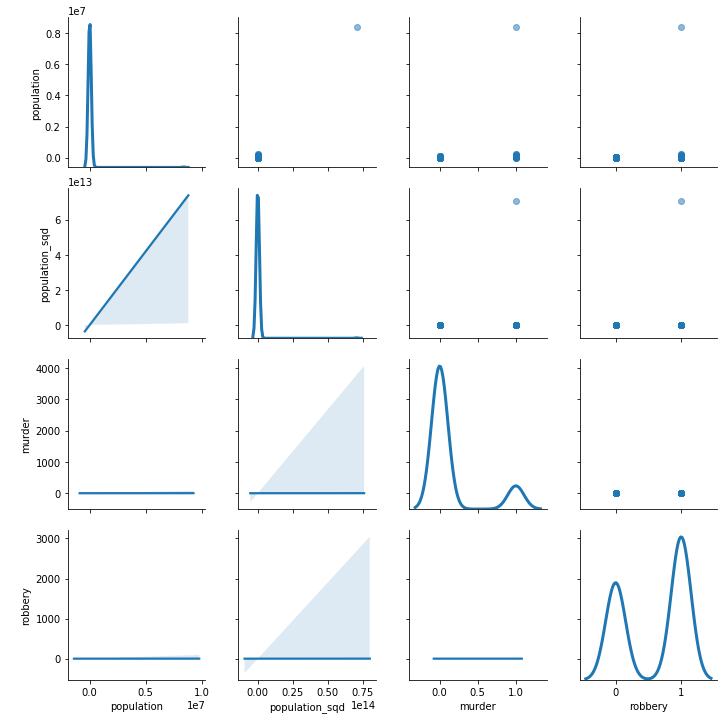

In [24]:
crime = sns.PairGrid(features, diag_sharey=False)

crime.map_upper(plt.scatter, alpha=.5)

crime.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

crime.map_diag(sns.kdeplot, lw=3)
plt.show();